In [25]:
import numpy as np
import pandas as pd
import numpy_financial as npf
from scipy import stats
import datetime

import yfinance as yf
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
import scipy.optimize as sc

import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-danger">
<b>WARNING: </b>

For question 5, you may want to use **pypfopt** package to construct the efficient frontier. If you use Python>=3.6, the plotting functionality of the **pypfopt** package may not work. Please use the function defined below to plot EfficientFrontier object.
</div>

In [26]:
import copy

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

## To-Do List

- [ ] Read Coursework Instructions
- [ ] Read Scenario Setting
- [ ] Question 1
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 2
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 3
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
  - [ ] Part h.)
  - [ ] Part i.)
- [ ] Question 4
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
- [ ] Question 5
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
- [ ] Question 6
  - [ ] Part a.)
  - [ ] Part b.)

## Scenario Setting
Conglomerates are companies that hold assets including other companies and involve themselves directly into the operations of their subsidiaries. Therefore, it is common for conglomerates to evaluate the business projects of their holdings to understand the returns of these projects.

Suppose that you are an executive director working for a conglomerate called Accretion and your job is to assist various operations of the subsidiaries that exist under Accretion, and then report back to the stakeholders.

## Question 1 [16 marks]

You areasked to evaluate businesses and investment ideas on behalf of Accretion as part of their portfolio reshuffling.

Boogle is one of the conglomerate's largest holdings. During the latest earnings report, Boogle's CFO announced an investment of \$150 million for a new business expansion project. The project is planned to be financed with an \$100 million public offering of a 10-year debt and the remainder with an equity offering. You have collected the information necessary to evaluate this project in Exhibits 1 and 2.

### Exhibit 1: Relevant Information for Analysis
| | |
| --- | --- |
| Equity risk premium | 4.93% |
| Risk-free rate of interest | 4.3% |
| Market value of Boogle's debt | \$1.0 billion |
| Market value of Boogle's equity | \$2.6 billion |
| Boogle's equity beta | 1.3 |
| Boogle's before-tax cost of debt | 9.4% |
| Corporate tax rate | 37.5% |


### Exhibit 2: Estimated Project Financials
|     | Year 1 | Year 2 | Year 3 |
| --- | --- | --- | --- |
| Revenue | 96.7 | 111.2 | 115.44 |
| Operating Costs | 32  | 36  | 38  |
| Depreciation | 16  | 16  | 16  |

1 a.) Calculate the weighted average cost of capital of Boogle prior to its new project investment. **\[3 marks\]**

In [27]:
# Solution

1 b.) Find Boogle's asset beta prior to the new project. **\[2 marks\]**

In [28]:
# Solution

1 c.) Assuming the new project has the same asset beta as the Boogle company in b.), find the the project equity beta. **\[2 marks\]**

In [29]:
# Solution

1 d.) The formula for project after-tax free cash flow at time t is

$$ FCF = (\text{Revenue}-\text{Operating Costs}-\text{Depreciation})\times(1-\text{Tax Rate})+\text{Depreciation}.$$

Define a Python function to calculate the project FCFs and demonstrate that the after-tax free cash flow generated for the next three years are $46.4 million, $53 million, and $54.4 million respectively. **\[2 marks\]**

In [30]:
# Solution

1 e.) Find the project NPV and IRR with the next three years after-tax free cash flow given in d.).**\[2 marks\]**

In [31]:
# Solution

You also aim to add dividend-paying stock to the conglomerate's portfolio of holdings. You begin by reviewing the following candidates:

### Candidate 1:
Atat Steel is in the steel manufacturing sector with a required rate of return of 7.35%. You estimate that if the economy is booming, the company’s current annual dividend of $0.7 per share will grow 11.5% a year for the next four years and then stabilize at a 3.5% growth rate a year indefinitely. However, if the economy falls into a recession, then Atat Steel will not likely experience the elevated 11.5% short-run growth and instead will grow by 3.5% indefinitely.

### Candidate 2:
GT&T company is a mature company with a stable capital structure. The company had an EPS of $2 in 2023. The earnings in the next year without the additional planned investments are expected to remain at $2. The earnings retention ratio is 0.60. The company is expected to earn an ROE of 15% on its investments, and the required rate of return is 12%. Assume that all dividends are paid at the end of the year.

1 f.) Use the discount dividend method and find the current value of Atat Steel stock under both economic conditions. **\[3 marks\]**

In [32]:
# Solution

1 g.) Calculate GT&T's sustainable growth rate, find the value of the company's stock at the beginning of 2024 and determine the company's present value of growth opportunities. **\[2 marks\]**

In [33]:
# Solution

## Question 2 \[15 marks\]
One of the businesses owned by Accretion, Nautilus is a machine tool manufacturer and system integrator, specialising in precision hydraulics for large-scale industrial applications.

Nautilus currently has several ground-breaking patents, on the stabilisation of structural columns for large-scale industrial developments in difficult soil conditions. This is planned to revolutionise the industry and be a massive boom for the future of Nautilus. The bond market has not reacted to this reveal of information for a whole year. With a new windfall from a successful year, Nautilus plans to repurchase some bonds it has already issued onto the market, thus you’re tasked to evaluate these issued bonds.

##Exhibit 3: Current Par Yield and Spot Rates
| Maturity | Par Rate (Annual Coupon) | Spot Rate (Annual Coupon) |
| --- | --- | --- |
| 1 year | 2.50% | 2.50% |
| 2 years | 2.99% | 3.00% |
| 3 years | 3.48% | 3.50% |
| 4 years | 3.95% | 4.00% |
| 5 years | 4.37% | ? |

##Exhibit 4: Information for Selected Bonds
| Bond Name | Maturity | Coupon | Type of Bond |
| --- | --- | --- | --- |
| Bond A (Face value $1,000) | 3 years | 6.40% annual | Option-free |
| Bond B | 3 years | 4.30% annual | Callable at par on start of year 1 and tear 2 |
| Bond C | 3 years | 4.30% annual | Putable at par on start of year 1 and year 2 |

##Exhibit 5: Binomial Interest Rate Tree, based on an estimated interest rate volatility of 10%, where ‘u’ represents an up move and ‘d’ represents a down move.
| Year 0 | Year 1 | Year 2 |
| --- | --- | --- |
| 2.2500% (r) | 3.5930% (ru node) | 4.6470% (ruu node) |
|  | 2.9417% (rd node) | 3.8046% (rud node) |
|  |  | 3.1150% (rdd node) |

2 a.) Based on Exhibit 3, find the five-year spot rate. **\[2 marks\]**

In [34]:
# Solution

2 b.) Assuming the law of one price, use Exhibit 3 to calculate the forward rate of a one-year loan starting in three years. **\[1 mark\]**

In [35]:
# Solution

2 c.) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates can be calculated? Please list the forward rates that can be calculated and briefly explain your answer. **\[3 marks\]**

In [36]:
# Solution

2 d.) Find the yield to maturity for Bond A. You can use the IRR function from NumPy Financial. **\[3 marks\]**

In [37]:
# Solution

2 e.) Based on Exhibit 5, assume an equal probability of interest rate going up and down at each node. Calculate the value of Bond B and Bond C with the binomial tree model. **\[3 marks\]**

In [38]:
# Solution

2 f.) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond C. **\[2 marks\]**

In [39]:
# Solution

2 g.) All else being equal, which bond is most likely to increase in value if interest rate volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the value of options) **\[1 mark\]**

In [40]:
# Solution

## Question 3 \[19 marks\]
Uiop, manages the money generated in the conglomerate. As part of your role to be in the know of the many operational parts of Accretion, you’ve been rotated to the strategic options desk within Uiop, and you’ve been asked to refresh your knowledge on derivatives and their pricing, by answering these questions.

Consider a stock that is trading at $100 today. The stock does not generate income/pay dividends. The stock is traded in a well-functioning market with no transaction costs and no restrictions on short sales. Both borrowing and lending can be done in unlimited amounts at the 2% risk-free rate.

3 a.) What is the difference between forward contracts and futures contracts (Answers should be no longer than 200 words) **\[4 marks\]**

Solution:

Forward contracts and futures contracts are both agreements to buy or sell an asset at a specified price on a future date, but they differ in several key aspects. Forward contracts are customizable agreements between two parties typically traded over-the-counter (OTC), allowing flexibility in terms of contract size, expiration date, and other terms. Futures contracts, on the other hand, are standardized and traded on exchanges, with fixed contract sizes, expiration dates, and set terms.

In a forward contract, there's a higher risk of default by either party as the contract is privately negotiated. Futures contracts, however, mitigate this risk by being guaranteed by a clearinghouse, which acts as an intermediary, ensuring both parties fulfill their obligations.


3 b.) Consider a futures contract on the stock with a maturity of one year. Suppose that the futures price is currently at $110. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit. **\[2 marks\]**

Solution:

Suppose the futures contract is fairly priced and there is no arbitrage opportunity. In that case, there is no difference between entering the futures contract today and buying the stock at time T.

Given the current stock price $ S_0 = 100 $ and the risk-free rate of 2%, the no-arbitrage futures price is $ F^*(0,1) = S_0e^{0.02*1} = 102.2 $. Since the futures price $ F(0, 1) = 110 > 102.2 $, there exists an arbitrage opportunity.

To execute a riskless arbitrage strategy:

At time $t=0$, sell the futures contract at $110 for delivery in one year. Simultaneously, borrow $100 at the risk-free rate of 2% and buy the underlying stock at the current market price of $100.

Hold the futures position and the purchased stock until the futures contract's maturity at time $t=1$. At expiration, use the long stock towards the settlement of the futures contract and receive $110. Pay back $100e^{0.02*1}=102.2$ (the borrowed $100 with interest).

| Asset | $T = 0$ | $T = 1$ |
| --- | --- | --- |
| Futures contract | $0$ | $+110-S_T$ |
| Cash | $+100$ | $-102.2$ |
| Stock | $-100$ | $+S_T$ |
| Total | $0$ | $+7.8$ |  

By following this strategy, we are able to profit $7.8 at no cost.

3 c.) Same as question b) but suppose that the futures price is currently at $95. Describe your arbitrage strategy. **\[2 marks\]**

Solution:

Similarly to part b), suppose the futures contract is fairly priced and there is no arbitrage opportunity.

Given the current stock price $ S_0 = 100 $ and the risk-free rate of 2%, the no-arbitrage futures price is $ F^*(0,1) = S_0e^{0.02*1} = 102.2 $. Since the futures price $ F(0, 1) = 95 < 102.2 $, there exists an arbitrage opportunity.


To execute a riskless arbitrage strategy:

At time $t=0$, buy the futures contract at $95 for delivery in one year. Simultaneously, short-sell the underlying stock at the current market price of $100 and invest $100 at the risk-free rate of 2%.

Hold the futures position and short stock position until the futures contract's maturity at time $t=1$. At expiration, collect $102.2, settle the futures contract to buy the stock at $95 and use it to exit the short-sold position.

| Asset | $T = 0$ | $T = 1$ |
| --- | --- | --- |
| Futures contract | $0$ | $+S_T-95$ |
| Stock | $+100$ | $-S_T$ |
| Cash | $-100$ | $+102.2$ |
| Total | $0$ | $+7.2$ |  

By following this strategy, we are able to profit $7.2 at no cost.

Suppose that you hold a long position on a European call option that has an underlying asset price of $57.03, strike price of $55, risk-free rate of 0.22%, 32% volatility, and time-to-expiration of 0.25. The underlying asset does not have any investment yield.

3 d.) Value this call option. **\[1 mark\]**

In [58]:
# Solution
# Given the details of the European call option:
s0 = 57.03
strike = 55
rf = 0.0022
vol = 0.32
time = 0.25

# We can calculate the value of the call option using the Black-Scholes option pricing model.

d1 = (np.log(s0/strike) + (rf + vol**2/2)*time) / (vol * time**0.5)
d2 = d1 - vol * time**0.5

# C = S * N(d1) - K * e^(-r(T-t)) * N(d2)
call = s0 * stats.norm.cdf(d1) - strike * np.exp(-1*rf*time) * stats.norm.cdf(d2)

print("The value of the call option is $",np.round(call, 2),".")

The value of the call option is $ 4.69 .


3 e.) Based on the Black-Scholes-Merton model, describe a portfolio that replicates the call option’s payoff. **\[1 mark\]**

Solution:

At the time of expiration of the call, the payoff of the call is max(S_T - 55, 0). We can replicate the call option's payoff with a portfolio consisting of a long put option, a long share of the underlying asset and a cash investment at the risk-free rate. 

$$
\text{Call payoff} = 
    \begin{cases}
        0 & \text{if } S_T \le K \\
        S_T - K & \text{if } S_T > K
    \end{cases}
$$

| Payoff | $S_T \le K$ | $S_T > K $ |
| --- | --- | --- |
| Stock | $S_T$ | $S_T$ |
| Put option | $ K - S_T $ | $0$ |
| Cash | $-K$ | $-K$ |
| Total | $0$ | $S_T - K$ |

$$
\begin{aligned}
\text{Portfolio payoff} = 
    \begin{cases}
        (S_T) + (K - S_T) + (-K) &= 0 & \text{if } S_T \le K \\
        (S_T) + (0) + (-K) &= S_T - K & \text{if } S_T > K
    \end{cases}
\end{aligned}
$$  

This portfolio's payoff matches the call payoff exactly.

3 f.) Define a function to price the option with the binomial tree method. The function should take the number of steps (n) as one of the inputs. You should NOT use list comprehension in the function. **\[3 marks\]**

In [42]:
# Solution
import math

def choose(n: int, i: int) -> float:
    return math.factorial(n)/(math.factorial(n-i)*math.factorial(i))

def binomial_call(s_0: float, k: float, T: float, r: float, sigma: float, q: float, n: int) -> float:
    """
    Binomial call function that computes all probabilities at once instead of individual steps.
    """
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    a = np.exp((r-q)*dt)
    p = (a-d)/(u-d)
    value = 0 
    for i in range(n+1):
        node_probability = choose(n, i) * (p**i) * ((1-p)**(n-i))
        s_T = s_0*(u)**i*(d)**(n-i)
        value += max(s_T-k, 0)*node_probability
    return np.round(value*np.exp(-r*T),4)

3 g.) By setting n = 10, 50 and 100, compare and comment on the results under the two methods. **\[2 marks\]**

In [43]:
# Solution
print("Binomial call pricing with 10 steps: ${}".format(binomial_call(57.03, 55, 0.25, 0.0022, 0.32, 0, 10)))
print("Binomial call pricing with 50 steps: ${}".format(binomial_call(57.03, 55, 0.25, 0.0022, 0.32, 0, 50)))
print("Binomial call pricing with 100 steps: ${}".format(binomial_call(57.03, 55, 0.25, 0.0022, 0.32, 0, 100)))

Binomial call pricing with 10 steps: $4.7645
Binomial call pricing with 50 steps: $4.6994
Binomial call pricing with 100 steps: $4.6937


When buying two calls with the exercises price of $x_{1}$ and $x_{3}$ and selling two calls with the exercise price of $x_{2}$, where
$$x_{2} = \frac{x_{1}+x_{3}}{2},$$
with the same maturity for the same stock, we call it a butterfly. Consider the following call options for the stock that trades at $57.03:
| Option Name | Strike Price | Call Premium (Price) |
| --- | --- | --- |
| Call Option 1 | 50 | 10 |
| Call Option 2 | 55 | 7 |
| Call Option 3 | 60 | 5 |

3 h.) Create a graphical representation of the butterfly strategy’s payoff. **\[2 marks\]**

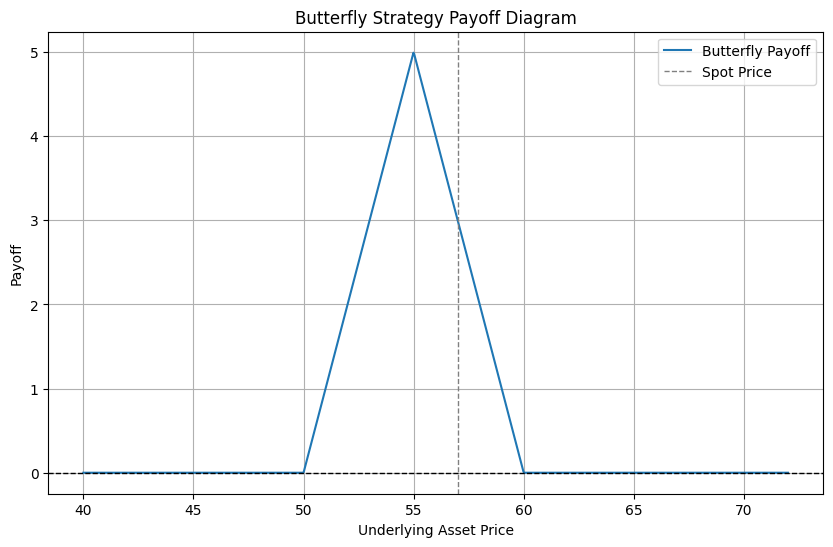

In [44]:
# Solution

# Generate a range of possible underlying asset prices
underlying_range = np.linspace(40, 72, 1000)

# Calculate payoffs for each option leg
long_call_1 = np.maximum(underlying_range - 50, 0)
short_call = -np.maximum(underlying_range - 55, 0)
long_call_2 = np.maximum(underlying_range - 60, 0)

# Calculate overall payoff of the butterfly strategy
butterfly_payoff = long_call_1 + 2*short_call + long_call_2

# Plotting the payoff diagram
plt.figure(figsize=(10, 6))
plt.plot(underlying_range, butterfly_payoff, label='Butterfly Payoff')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Payoff')
plt.title('Butterfly Strategy Payoff Diagram')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(57.03, color='gray', linestyle='--', linewidth=1, label='Spot Price')
plt.legend()
plt.grid(True)
plt.show()

3 i.) Why might an investor enter into such a strategy? **\[2 marks\]**

Solution:

An investor might enter such a strategy if they believe that the price of the underlying asset will be at or near $55 at the time of maturity of the calls. Good for investors who are risk-averse, through this strategy, they know their maximum profits and losses


## Question 4 \[13 marks\]
Suppose that you want to build a portfolio with the stocks (with tickers of) AAPL, GOOG, AMZN and META. You plan to retrieve the relevant Yahoo Finance data with the yfinance Python module from the 1st of Jan. 2017 to 1st of Nov. 2023 (inclusive).

4 a.) Calculate the daily returns of these stocks. You should use the adjusted daily closing price. **\[1 mark\]**

In [45]:
# Solution
daily_returns = yf.download(['AAPL','GOOG','AMZN','META'], start="2017-01-01", end="2023-11-01")["Adj Close"].pct_change().dropna()
daily_mean_returns = daily_returns.mean()

daily_returns.head(5)

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,META
Date,,,,
2017-01-04,-0.001119,0.004657,0.000967,0.015660
2017-01-05,0.005085,0.030732,0.009048,0.016682
2017-01-06,0.011148,0.019912,0.015277,0.022707
2017-01-09,0.009159,0.001168,0.000620,0.012074
2017-01-10,0.001008,-0.001280,-0.002306,-0.004404


4 b) Based on a.), find the covariance matrix of these stocks. **\[1 mark\]**

In [46]:
# Solution
daily_cov_matrix = daily_returns.cov()

daily_cov_matrix

,AAPL,AMZN,GOOG,META
AAPL,0.000365,0.000253,0.000239,0.000278
AMZN,0.000253,0.000458,0.000270,0.000331
GOOG,0.000239,0.000270,0.000349,0.000317
META,0.000278,0.000331,0.000317,0.000649


4 c.) Suppose that the four stocks are equally weighted, find the annualised portfolio expected returns and portfolio variance. **\[2 marks\]**

In [47]:
# Solution
weights = np.array([0.25, 0.25, 0.25, 0.25])

annualized_returns = (1+daily_mean_returns)**252-1
portfolio_returns = np.sum(annualized_returns*weights)
annualized_cov_matrix = daily_cov_matrix*252
portfolio_variance = np.dot(weights.T, np.dot(annualized_cov_matrix, weights))

portfolio_returns, portfolio_variance

(0.2834809974239107, 0.0818480935892704)

4 d.) Find the efficient portfolio with the maximum Sharpe ratio. What is the corresponding Sharpe ratio? **\[2 marks\]**

In [48]:
# Solution
ef = EfficientFrontier(annualized_returns, annualized_cov_matrix)

max_sharpe_weights = ef.max_sharpe()

ef.portfolio_performance(verbose=True)
ef.clean_weights()

Expected annual return: 36.8%
Annual volatility: 30.0%
Sharpe Ratio: 1.16


OrderedDict([('AAPL', 0.96017),
             ('AMZN', 0.03983),
             ('GOOG', 0.0),
             ('META', 0.0)])

4 e.) Plot the efficient frontier (Without the use of the Plotly library in Python). **\[3 mark\]**

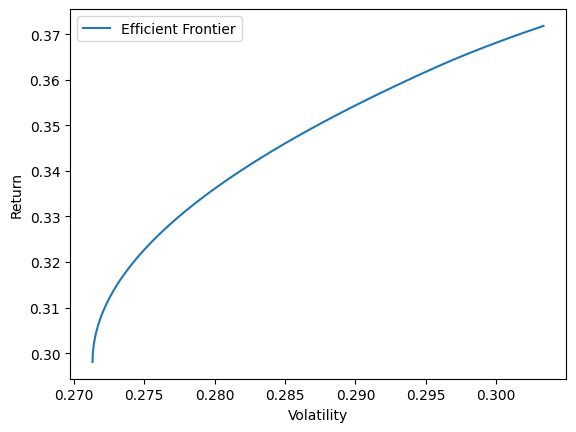

In [49]:
# Solution
plot_efficient_frontier(EfficientFrontier(annualized_returns, annualized_cov_matrix))

4 f.) Based on the concept of diversification, comment on the current portfolio. How can this portfolio be improved? (Answers should be no longer than 200 words) **\[4 marks\]**

This portfolio lacks diversity beyond the tech sector. The performances of AAPL, GOOG, AMZN, and META tend to align due to market correlations, limiting diversification benefits. To enhance this portfolio, including stocks from different sectors (e.g., healthcare, consumer goods, finance) should be considered to spread risk across industries with different correlations to the broader market.  
Exploring alternative assets beyond stocks, like bonds, commodities, or real estate, can also enhance diversification. These assets often behave differently than equities, potentially providing stability during market fluctuations.  
Additionally, analyzing fundamental aspects like company size, growth potential, geographical exposure, and revenue sources might uncover hidden correlations within seemingly diverse stocks.  
Finally, the portfolio needs to be tracked and rebalanced to ensure alignment to maintain desired diversification levels.

## Question 5 \[14 marks\]
A high-profile client Pam, whom you’ve built a great business relationship with over the years has asked you to quickly double-check some figures for life insurance he has received. You decide to apply the [2015 VBT Unismoke ANB/ALB](http://www.soa.org/files/research/exp-study/2015-vbt-smoker-distinct-alb-anb.xlsx), the Valuation Basic Table (VBT) to using the Age Nearest Birthday (ANB) method, with a valuation interest rate of 5.2% you submit your calculated figures to aid Pam's decision.

Today is 11 November 2023, and the type of life insurance Pam was viewing was permanent life insurance. Pam was born on 25 March 1980, with the health condition standard for her cohort of the same age and gender (Female).

5 a.) Calculate Pam’s annual unconditional survival rates $_{n}p_{x}$ from now to age 54. **\[4 marks\]**

In [60]:
# Solution

# Pam is 43 years, 7 months and 17 days old, meaning that she is closest to her 44th birthday.
# We extract the mortality rates for Pam's cohort from 2015_FNS_ANB, for issue age 44.
time = range(0, 77)
age = range(44, 44+77)
mortality_rates_cond = np.array([0, 0.18, 0.26, 0.38, 0.58, 0.68, 0.75, 0.82, 0.93, 1.09, 1.25, 1.40, 
                                 1.57, 1.79, 2.01, 2.23, 2.47, 2.73, 3.04, 3.42, 3.90, 4.39, 4.83, 
                                 5.30, 5.81, 6.37, 6.99, 7.73, 8.60, 9.63, 10.82, 12.22, 13.84, 15.68, 
                                 17.82, 20.32, 23.30, 26.91, 31.06, 35.15, 39.61, 44.97, 53.19, 60.47, 
                                 68.64, 78.21, 88.84, 100.49, 112.92, 126.41, 140.96, 155.80, 171.79, 
                                 191.55, 213.29, 237.02, 262.44, 289.19, 313.30, 337.47, 361.33, 384.50, 
                                 406.60, 427.26, 446.11, 462.77, 476.86, 488.00, 495.83, 500.00, 500.00, 
                                 500.00, 500.00, 500.00, 500.00, 500.00, 500.00])/1000
data = {'age':age, 'mortality_rates_cond':mortality_rates_cond}
df = pd.DataFrame(index=time, data=data)


# Probability that Pam survives in the next year
df['survival_rates_cond'] = 1 - df['mortality_rates_cond']

# Probability that Pam is alive at the n-th year
df.loc[0,'survival_rates_yearly'] = 1
for t in range(1, len(df)):
    df.loc[t,'survival_rates_yearly'] = df.loc[t,'survival_rates_cond']*df.loc[t-1,'survival_rates_yearly']


# Wasn't sure which one we need to calculate but I think it's 'survival_rates_yearly'
# If not:


# Probability that Pam dies between year n-1 and n
df.loc[0,'mortality_rates_uncond'] = 0
for t in range(1, len(df)):
    df.loc[t, 'mortality_rates_uncond'] = df.loc[t, 'mortality_rates_cond']*df.loc[t-1, 'survival_rates_yearly']

# Probability that Pam is alive between year n-1 and n
df['survival_rates_uncond'] = 1 - df['mortality_rates_uncond']



np.round(df[['age', 'survival_rates_yearly'#, 'survival_rates_uncond'
             ]].head(11),5)

,age,survival_rates_yearly
0,44,1.00000
1,45,0.99982
2,46,0.99956
3,47,0.99918
4,48,0.99860
5,49,0.99792
6,50,0.99717
7,51,0.99636
8,52,0.99543
9,53,0.99434


5 b.) Calculate Pam’s life expectancy in years (to one decimal place). **\[3 marks\]**

In [51]:
# Solution
life_expectancy = sum(df['survival_rates_yearly']) - 0.5

print('Pam\'s life expectancy is ' + str(np.round(life_expectancy, 1)) + ' years.')

Pam's life expectancy is 43.7 years.


5 c.) Calculate the probability that Pam dies exactly between 6 and 9 years from now (to five decimal places). **\[3 marks\]**  

$$ _{3|6}q_{44} = _{6}p_{44} * q_{50} + _{7}p_{44} * q_{51} + _{8}p_{44} * q_{52} $$

In [62]:
# Solution
prob_7_9 = sum(df.loc[7:9,'mortality_rates_uncond'])

print('The probability that Pam dies exactly between 6 and 9 years from now is ' + str(np.round(prob_7_9, 5)) + '.')
#print(df.loc[7:9])

The probability that Pam dies exactly between 6 and 9 years from now is 0.00283.


5 d.) Calculate the minimum annual premium rate (premium as a fraction of death benefit) that your company should charge for Pam's cohort (to five decimal places). **\[4 marks\]**

$$ PV = \sum_{n=0}^\infty \frac{ _{n}p_x * \pi_n - P_n * DB}{(1 + r)^n} $$  
$\pi_n$ is a fraction of $DB$, so set $ \pi_n = \text{premium} * DB $.  
We want to find the minimum premium, so it is the premium that gives a present value of 0 i.e. 
$$
\begin{aligned}
\sum_{n=0}^\infty \frac{ _{n}p_x * \text{premium} * DB - P_n * DB}{(1 + r)^n} &= 0 \\
DB * \sum_{n=0}^\infty \frac{ _{n}p_x * \text{premium} - P_n}{(1 + r)^n} &= 0 \\
\sum_{n=0}^\infty \frac{ _{n}p_x * \text{premium} - P_n}{(1 + r)^n} &= 0 \\
\sum_{n=0}^\infty \frac{ _{n}p_x * \text{premium}}{(1 + r)^n} - \sum_{n=0}^\infty \frac{ P_n }{(1 + r)^n} &= 0
\end{aligned} \\
\begin{aligned}
&\text{premium} * \sum_{n=0}^\infty \frac{ _{n}p_x }{(1 + r)^n} = \sum_{n=0}^\infty \frac{ P_n }{(1 + r)^n} \\
&\text{premium} = \frac{\sum_{n=0}^\infty \frac{ P_n }{(1 + r)^n} }{ \sum_{n=0}^\infty \frac{ _{n}p_x}{(1 + r)^n}}
\end{aligned}
$$
Let $ \text{Discount survival} = \sum_{n=0}^\infty \frac{_{n}p_x }{ (1 + r)^n } $ and $\text{Discount mortality} = \sum_{n=0}^\infty \frac{ P_n }{(1 + r)^n}$.  
Then $ \text{premium} = \frac{\text{Discount mortality}}{\text{Discount survival}} $.

In [53]:
# Solution

r = 0.052
df['discount'] = (1+r)**df.index
df['discount_surivival'] = df['survival_rates_yearly'] / df['discount']
df['discount_mortality'] = df['mortality_rates_uncond'] / df['discount']

premium = np.round( sum(df['discount_mortality']) / sum(df['discount_surivival']) , 5)

print('The minimum annual premium rate as a fraction of death benefit that your company should charge for Pam\'s cohort is ' + str(np.round(premium, 5)) + '.')

The minimum annual premium rate as a fraction of death benefit that your company should charge for Pam's cohort is 0.00701.


## Question 6 \[8 marks\]
The conglomerate you are working for, Accretion, decided to digitalize the financial analysis in order to optimize their operations. Since you have expertise in a multitude of financial instruments, you have been tasked to perform the innovation.

Firstly, you are asked to design a tool for computing the zero spot rates using the bootstrap method, and then verify its validity by applying it to Exhibit 6 below.

### Exhibit 6: Spot Rate Table
| Principal | Maturity (Years) | Coupon (per Year) | Price | Coupon Frequency | Zero Rate (Continuous) |
| --- | --- | --- | --- | --- | --- |
| 100 | 0.5 | 0 | 99.8 | 0.5 (SA) | 0.4% |
| 100 | 1 | 4 | 101.2 | 1 (A) | 2.729% |
| 100 | 1.5 | 5 | 102.4 | 0.5 (SA) | 3.353% |

- SA: Semi-annual coupon
- A: Annual coupon

6 a.) Design a function that take in the required parameters for the bootstrap method in form of a Pandas DataFrame and returns the same DataFrame but with a new column called "Zero Rates". Then, check that your function gives the correct spot rates in the table above. **\[4 mark\]**

In [54]:
spot_rate_df = pd.DataFrame([[100, 0.5, 0, 99.8, 0.5], [100, 1, 4, 101.2, 1], [100, 1.5, 5, 102.4, 0.5]],
                            columns=["Principal", "Maturity", "Coupon", "Price", "Coupon Frequency"])

def bootstrap_method(df: pd.DataFrame) -> pd.DataFrame:
    # Solution
    
    return df

bootstrap_method(df=spot_rate_df)

,Principal,Maturity,Coupon,Price,Coupon Frequency
0,100,0.5,0,99.8,0.5
1,100,1.0,4,101.2,1.0
2,100,1.5,5,102.4,0.5


It is often that in real world investors encounter friction costs such as fees, commissions and other types of expenses. Currently, NPV is used to measure ther value of an investment opportunity:

$$NPV = C_{0} + PV.$$

Your task is to design a tool for evaluating net value of a bond, which takes into consideration accrued interest, commission fees on entrance and exit (assume there is commission for settling the return of the principal), and administrative fees, which are monthly fees associated with the exchange that keeps track of asset ownership.

6 b.) Define a python function for calculating the net value of a bond subject to accrued interest, entry and exit fees and administrative fees (assume the administrative fees are paid out at the same frequency as the coupons). The accrued interest MUST be computed from the coupon value. **\[3 marks\]**

In [55]:
def improved_npv(principal: float, coupon: float, price: float, interest_rate: float, n_periods:float, administrative_fee: float, entry_fee: float,
                 exit_fee: float, days_from_last_coupon: int, coupon_frequency_per_year: float) -> float:
    # Solution
    return

6 c.) Using the values from Exhibit 7 compute the net value of the investment. Is this a good investment considering all the expenses? **\[1 mark\]**

### Exhibit 7: Information for an Investment
| Parameter | Value |
| --- | --- |
| Principal | $100 |
| Coupon | $4 (Yearly) |
| Price | $101.5 |
| Interest Rate | 2% |
| Maturity | 3 years |
| Administrative Fee | $1 (Yearly) |
| Entry Fee | $5 |
| Exit Fee | $5 |
| Days from Last Coupon | 200 |

In [56]:
# Solution